## 2. Baseline without MW (75 pts)

In [1]:
%load_ext autoreload
%autoreload 2

from queries import query_mw as q_mw
from queries import query_client as q_client
from queries import exp_filter

from plots.ctrl import generate
from plots import tp, rt

suite={
    "exp21":"simulation",
    "exp22":"simulation"
}

### 2.1 One Server

In [2]:
exp_name="exp21"
df_exp21 = q_client.load_df(suite=suite[exp_name], exp=exp_name)

Client: 0 repetitions don't have throughput


#### Write-Only

Write-Only Bandwidth Limit:		599.5 MBit/sec
Write-Only Bandwidth Throughput Limit:	18295.0 ops/sec


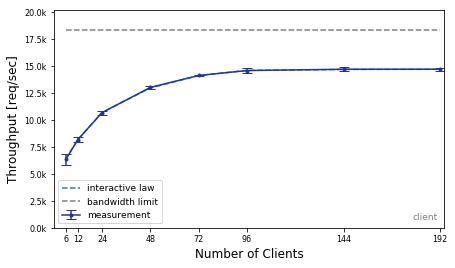

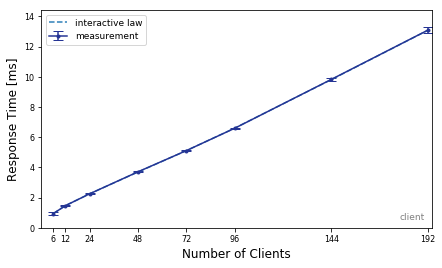

In [3]:
df_exp21_wo = df_exp21[df_exp21['workload']=='write-only']
df_exp21_wo = df_exp21_wo[~ df_exp21_wo['num_clients'].isin(exp_filter.exp21['write-only'])]

print(f"Write-Only Bandwidth Limit:\t\t{df_exp21_wo['write_bandwidth_limit'].unique()[0]} MBit/sec")    
print(f"Write-Only Bandwidth Throughput Limit:\t{df_exp21_wo['bandwidth_limit_write_throughput'].unique().round(0)[0]} ops/sec")

generate(tp.nc, df_exp21_wo, suite[exp_name], f"{exp_name}_wo_tp_nc")
generate(rt.nc, df_exp21_wo, suite[exp_name], f"{exp_name}_wo_rt_nc")

#### Read-Only

Read-Only Bandwidth Limit:		99.59999999999998 MBit/sec
Read-Only Bandwidth Throughput Limit:	3040.0 ops/sec


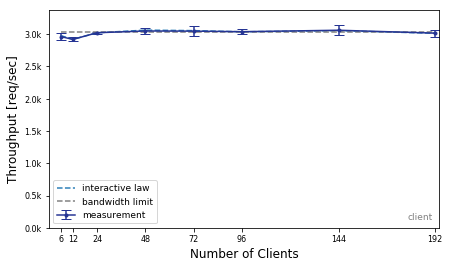

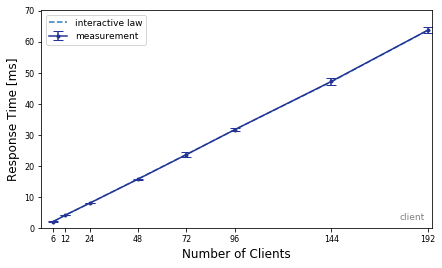

In [4]:
df_exp21_ro = df_exp21[df_exp21['workload']=='read-only']
df_exp21_ro = df_exp21_ro[~ df_exp21_ro['num_clients'].isin(exp_filter.exp21['read-only'])]

print(f"Read-Only Bandwidth Limit:\t\t{df_exp21_ro['read_bandwidth_limit'].unique()[0]} MBit/sec")    
print(f"Read-Only Bandwidth Throughput Limit:\t{df_exp21_ro['bandwidth_limit_read_throughput'].unique().round(0)[0]} ops/sec")


generate(tp.nc, df_exp21_ro, suite[exp_name], f"{exp_name}_ro_tp_nc")
generate(rt.nc, df_exp21_ro, suite[exp_name], f"{exp_name}_ro_rt_nc")

### 2.2 Two Server

In [5]:
exp_name="exp22"
df_exp22 = q_client.load_df(suite=suite[exp_name], exp=exp_name)

Client: 0 repetitions don't have throughput


#### Write-Only

Write-Only Bandwidth Limit:		199.0 MBit/sec
Write-Only Bandwidth Throughput Limit:	6062.0 ops/sec


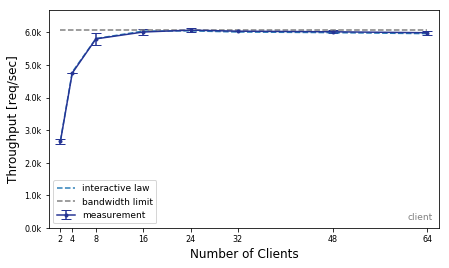

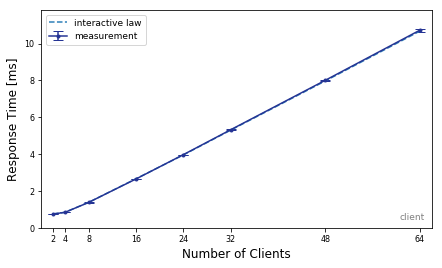

In [6]:
df_exp22_wo = df_exp22[df_exp22['workload']=='write-only']

print(f"Write-Only Bandwidth Limit:\t\t{df_exp22_wo['write_bandwidth_limit'].unique().round(0)[0]} MBit/sec")    
print(f"Write-Only Bandwidth Throughput Limit:\t{df_exp22_wo['bandwidth_limit_write_throughput'].unique().round(0)[0]} ops/sec")

generate(tp.nc, df_exp22_wo, suite[exp_name], f"{exp_name}_wo_tp_nc")
generate(rt.nc, df_exp22_wo, suite[exp_name], f"{exp_name}_wo_rt_nc")

#### Read-Only

Read-Only Bandwidth Limit:		197.0 MBit/sec
Read-Only Bandwidth Throughput Limit:	6018.0 ops/sec


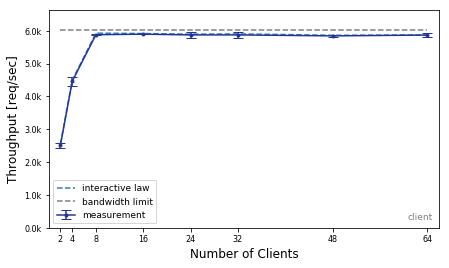

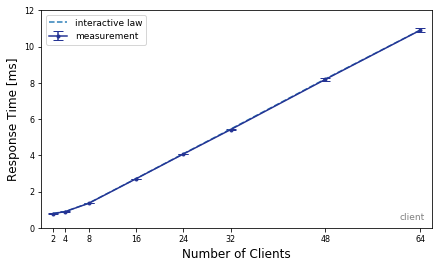

In [7]:
df_exp22_ro = df_exp22[df_exp22['workload']=='read-only']

print(f"Read-Only Bandwidth Limit:\t\t{df_exp22_ro['read_bandwidth_limit'].unique().round(0)[0]} MBit/sec")    
print(f"Read-Only Bandwidth Throughput Limit:\t{df_exp22_ro['bandwidth_limit_read_throughput'].unique().round(0)[0]} ops/sec")


generate(tp.nc, df_exp22_ro, suite[exp_name], f"{exp_name}_ro_tp_nc")
generate(rt.nc, df_exp22_ro, suite[exp_name], f"{exp_name}_ro_rt_nc")

### 2.3 Summary

In [8]:
cols = ['n_server_vm', 'n_client_vm', 'workload', 'num_clients', 'throughput_rep_mean', 'rt_rep_mean']
index_cols = ['n_server_vm', 'n_client_vm', 'workload', 'num_clients']


display(df_exp21_wo[cols].set_index(index_cols).round(2))
display(df_exp21_ro[cols].set_index(index_cols).round(2))

display(df_exp22_wo[cols].set_index(index_cols).round(2))
display(df_exp22_ro[cols].set_index(index_cols).round(2))

throughput_rep_mean  \
n_server_vm n_client_vm workload   num_clients                        
1           3           write-only 6                        6339.70   
                                   12                       8161.96   
                                   24                      10665.18   
                                   48                      12989.03   
                                   72                      14097.15   
                                   96                      14552.29   
                                   144                     14675.59   
                                   192                     14677.11   

                                                rt_rep_mean  
n_server_vm n_client_vm workload   num_clients               
1           3           write-only 6                   0.95  
                                   12                  1.47  
                                   24                  2.25  
                                   48                  3.71  
                                   72                  5.11  
                                   96                  6.59  
                                   144                 9.83  
                                   192                13.09

throughput_rep_mean  \
n_server_vm n_client_vm workload  num_clients                        
1           3           read-only 6                        2962.54   
                                  12                       2918.38   
                                  24                       3021.52   
                                  48                       3048.94   
                                  72                       3046.56   
                                  96                       3037.96   
                                  144                      3060.43   
                                  192                      3015.19   

                                               rt_rep_mean  
n_server_vm n_client_vm workload  num_clients               
1           3           read-only 6                   2.02  
                                  12                  4.11  
                                  24                  7.94  
                                  48                 15.68  
                                  72                 23.57  
                                  96                 31.62  
                                  144                47.16  
                                  192                63.71

throughput_rep_mean  \
n_server_vm n_client_vm workload   num_clients                        
2           1           write-only 2                        2652.19   
                                   4                        4750.66   
                                   8                        5802.36   
                                   16                       6012.41   
                                   24                       6070.70   
                                   32                       6038.47   
                                   48                       6020.00   
                                   64                       5990.30   

                                                rt_rep_mean  
n_server_vm n_client_vm workload   num_clients               
2           1           write-only 2                   0.75  
                                   4                   0.84  
                                   8                   1.38  
                                   16                  2.65  
                                   24                  3.97  
                                   32                  5.32  
                                   48                  8.01  
                                   64                 10.73

throughput_rep_mean  \
n_server_vm n_client_vm workload  num_clients                        
2           1           read-only 2                        2511.86   
                                  4                        4460.27   
                                  8                        5878.18   
                                  16                       5894.78   
                                  24                       5871.91   
                                  32                       5872.45   
                                  48                       5842.90   
                                  64                       5867.72   

                                               rt_rep_mean  
n_server_vm n_client_vm workload  num_clients               
2           1           read-only 2                   0.78  
                                  4                   0.89  
                                  8                   1.35  
                                  16                  2.70  
                                  24                  4.07  
                                  32                  5.42  
                                  48                  8.19  
                                  64                 10.90